In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
CustomerChurn = pd.read_csv('/content/drive/MyDrive/Classroom/Customer Churn Dataset/Customer Churn Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
CustomerChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   Churn_coded                51047 non-null  int64  
 3   MonthlyRevenue             50891 non-null  float64
 4   MonthlyMinutes             50891 non-null  float64
 5   TotalRecurringCharge       50891 non-null  float64
 6   DirectorAssistedCalls      50891 non-null  float64
 7   OverageMinutes             50891 non-null  float64
 8   RoamingCalls               50891 non-null  float64
 9   PercChangeMinutes          50680 non-null  float64
 10  PercChangeRevenues         50680 non-null  float64
 11  DroppedCalls               51047 non-null  float64
 12  BlockedCalls               51047 non-null  float64
 13  UnansweredCalls            51047 non-null  flo

In [ ]:
CustomerChurn.shape

(51047, 59)

In [ ]:
CustomerChurn.head()

,CustomerID,Churn,Churn_coded,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,2,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [ ]:
CustomerChurn.tail()

,CustomerID,Churn,Churn_coded,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
51042,3399958,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,2,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No
51046,3399994,No,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,No,1,60,Yes,5-Low,Other,Other,Unknown


In [ ]:
CustomerChurn.isnull().sum()

,0
CustomerID,0
Churn,0
Churn_coded,0
MonthlyRevenue,156
MonthlyMinutes,156
TotalRecurringCharge,156
DirectorAssistedCalls,156
OverageMinutes,156
RoamingCalls,156
PercChangeMinutes,367


In [ ]:
CustomerChurn = CustomerChurn.dropna()

In [ ]:
CustomerChurn.isnull().sum()

,0
CustomerID,0
Churn,0
Churn_coded,0
MonthlyRevenue,0
MonthlyMinutes,0
TotalRecurringCharge,0
DirectorAssistedCalls,0
OverageMinutes,0
RoamingCalls,0
PercChangeMinutes,0


In [ ]:
CustomerChurn.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,49752.0,3.200958e+06,116469.396546,3000002.00,3100094.00,3200144.00,3303643.00,3399974.00
Churn_coded,49752.0,1.713680e+00,0.452045,1.00,1.00,2.00,2.00,2.00
MonthlyRevenue,49752.0,5.871737e+01,44.317244,-6.17,33.61,48.38,70.91,1223.38
MonthlyMinutes,49752.0,5.250215e+02,528.510155,0.00,158.00,366.00,722.00,7359.00
TotalRecurringCharge,49752.0,4.683496e+01,23.759492,-6.00,30.00,45.00,60.00,400.00
DirectorAssistedCalls,49752.0,8.918407e-01,2.224725,0.00,0.00,0.25,0.99,159.39
OverageMinutes,49752.0,3.975404e+01,96.091606,0.00,0.00,3.00,40.00,4321.00
RoamingCalls,49752.0,1.226327e+00,9.848360,0.00,0.00,0.00,0.30,1112.40
PercChangeMinutes,49752.0,-1.165617e+01,255.858193,-3875.00,-83.00,-5.00,65.00,5192.00
PercChangeRevenues,49752.0,-1.175937e+00,39.392124,-1107.70,-7.00,-0.30,1.60,2483.50


In [ ]:
count = len(CustomerChurn.describe().T)
count

36

In [ ]:
#Here, CustomerID and Churn_coded is not inluded here.
# In that case, is there a way we can sort the floating datatypes at once instead of picking it one after the other.
some_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls','PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls','CallForwardingCalls','CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']
some_columns

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCreditRating']

In [ ]:
count_ = len(some_columns)
count_

34

In [ ]:
CustomerChurn.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49752 entries, 0 to 51043
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   Churn                      49752 non-null  object 
 2   Churn_coded                49752 non-null  int64  
 3   MonthlyRevenue             49752 non-null  float64
 4   MonthlyMinutes             49752 non-null  float64
 5   TotalRecurringCharge       49752 non-null  float64
 6   DirectorAssistedCalls      49752 non-null  float64
 7   OverageMinutes             49752 non-null  float64
 8   RoamingCalls               49752 non-null  float64
 9   PercChangeMinutes          49752 non-null  float64
 10  PercChangeRevenues         49752 non-null  float64
 11  DroppedCalls               49752 non-null  float64
 12  BlockedCalls               49752 non-null  float64
 13  UnansweredCalls            49752 non-null  float64


In [ ]:
#CustomerChurn['MonthlyRevenue'].fillna(2.2, inplace=True)
#CustomerChurn['TotalRecurringCharge'].fillna(2, inplace=True)
#CustomerChurn['DirectorAssistedCalls'].fillna(1, inplace=True)
#CustomerChurn['OverageMinutes'].fillna(2.1, inplace=True)
#CustomerChurn['RoamingCalls'].fillna(5.5, inplace=True)
#CustomerChurn['PercChangeMinutes'].fillna(100, inplace=True)
#CustomerChurn['PercChangeRevenues'].fillna(12, inplace=True)
#CustomerChurn['ServiceArea'].fillna('missing1', inplace=True)
#CustomerChurn['Handsets'].fillna(0.1, inplace=True)
#CustomerChurn['HandsetModels'].fillna(100, inplace=True)
#CustomerChurn['CurrentEquipmentDays'].fillna(1000, inplace=True)
#CustomerChurn['AgeHH1'].fillna(1000, inplace=True)
#CustomerChurn['AgeHH2'].fillna(1000, inplace=True)



In [ ]:
print(CustomerChurn.Churn_coded.value_counts())

Churn_coded
2    35507
1    14245
Name: count, dtype: int64


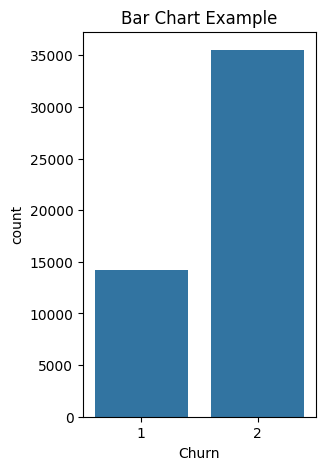

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='Churn_coded', data=CustomerChurn,)
plt.xlabel('Churn')
plt.title('Bar Chart Example')
plt.show()


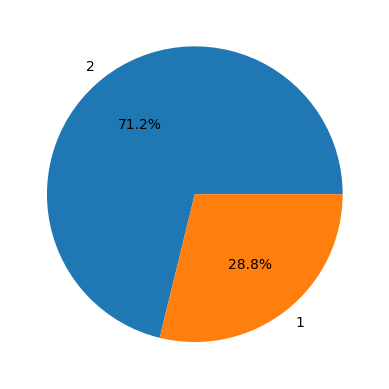

In [ ]:
pie_data = plt.pie(CustomerChurn['Churn_coded'].value_counts().values, labels=CustomerChurn['Churn_coded'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.ServiceArea.value_counts())

ServiceArea
NYCBRO917    1646
DALDAL214    1479
HOUHOU281    1471
NYCMAN917    1156
DALFTW817     771
             ... 
SANROM956       1
INDCRA765       1
SEWSUN509       1
ATLDBL478       1
NCRDNN910       1
Name: count, Length: 743, dtype: int64


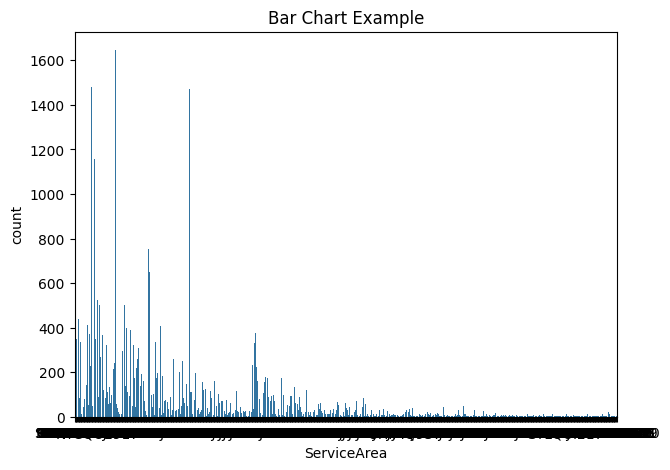

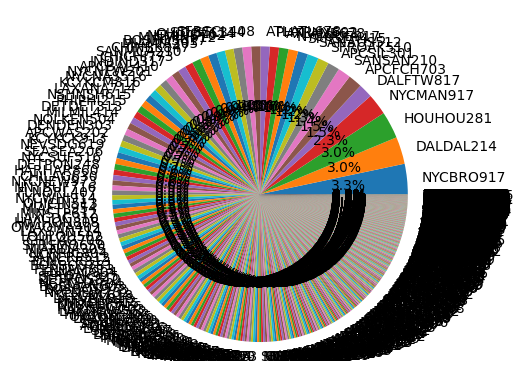

In [ ]:
# I don't think we need to analyse ServiceArea.
plt.figure(figsize=(7,5))
sns.countplot(x='ServiceArea', data=CustomerChurn,)
plt.xlabel('ServiceArea')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['ServiceArea'].value_counts().values, labels=CustomerChurn['ServiceArea'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.Handsets.value_counts())

Handsets
1.0     28139
2.0     12369
3.0      4946
4.0      2171
5.0      1007
6.0       477
7.0       289
8.0       140
9.0        81
10.0       38
11.0       34
12.0       19
13.0       15
14.0        7
16.0        4
15.0        3
19.0        3
17.0        3
24.0        2
18.0        2
21.0        1
22.0        1
20.0        1
Name: count, dtype: int64


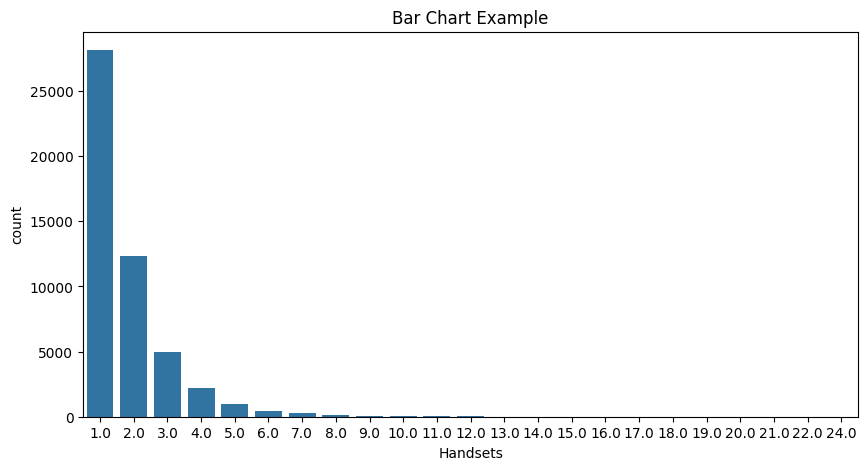

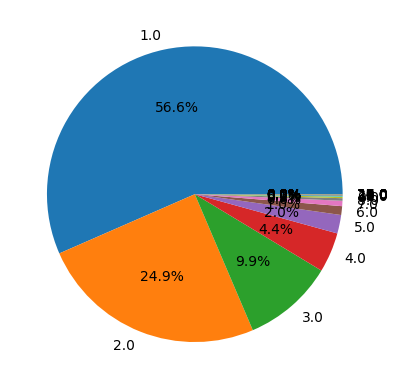

In [ ]:
# Don't mind me here, I just decided to try this out and see the result.

plt.figure(figsize=(10,5))
sns.countplot(x='Handsets', data=CustomerChurn,)
plt.xlabel('Handsets')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['Handsets'].value_counts().values, labels=CustomerChurn['Handsets'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.ChildrenInHH.value_counts())

ChildrenInHH
No     37483
Yes    12269
Name: count, dtype: int64


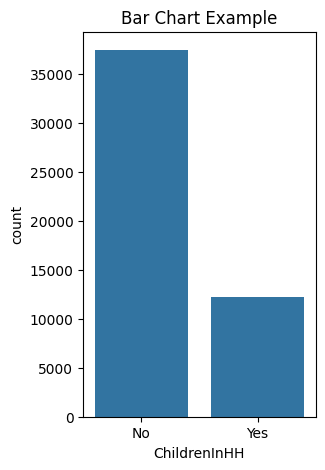

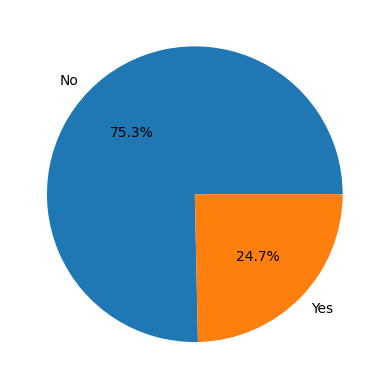

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='ChildrenInHH', data=CustomerChurn,)
plt.xlabel('ChildrenInHH')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['ChildrenInHH'].value_counts().values, labels=CustomerChurn['ChildrenInHH'].value_counts().index, autopct='%1.1f%%')


In [ ]:
print(CustomerChurn.HandsetRefurbished.value_counts())

HandsetRefurbished
No     42852
Yes     6900
Name: count, dtype: int64


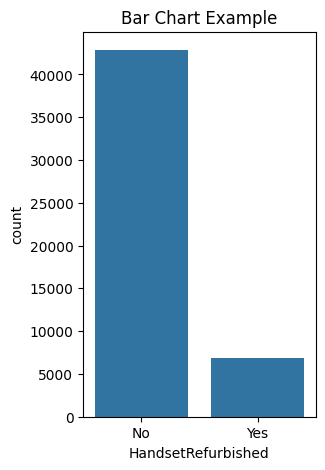

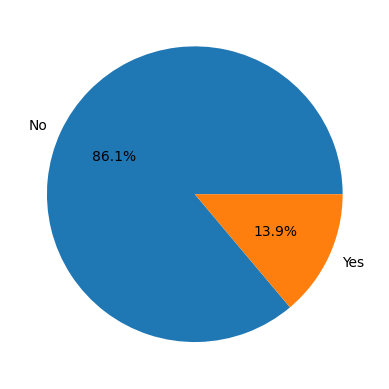

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='HandsetRefurbished', data=CustomerChurn,)
plt.xlabel('HandsetRefurbished')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['HandsetRefurbished'].value_counts().values, labels=CustomerChurn['HandsetRefurbished'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.HandsetWebCapable.value_counts())

HandsetWebCapable
Yes    44905
No      4847
Name: count, dtype: int64


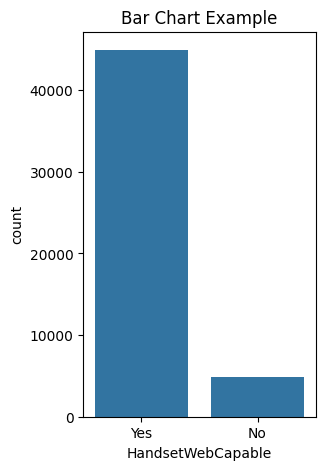

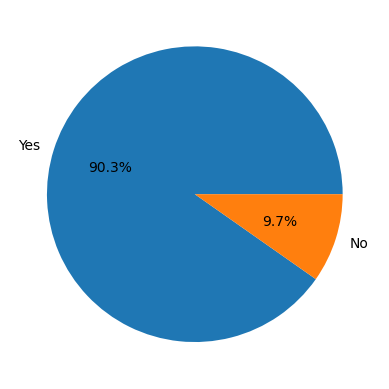

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='HandsetWebCapable', data=CustomerChurn,)
plt.xlabel('HandsetWebCapable')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['HandsetWebCapable'].value_counts().values, labels=CustomerChurn['HandsetWebCapable'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.TruckOwner.value_counts())

TruckOwner
No     40280
Yes     9472
Name: count, dtype: int64


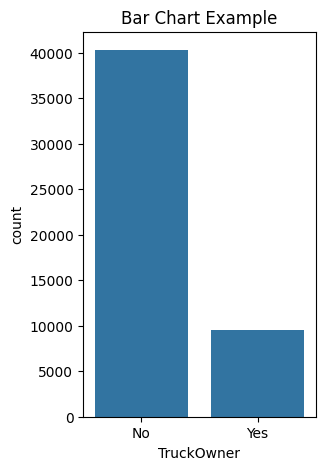

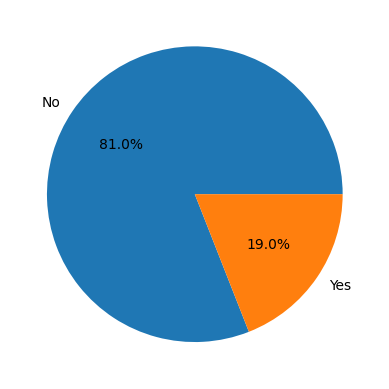

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='TruckOwner', data=CustomerChurn,)
plt.xlabel('TruckOwner')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['TruckOwner'].value_counts().values, labels=CustomerChurn['TruckOwner'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.RVOwner.value_counts())

RVOwner
No     45619
Yes     4133
Name: count, dtype: int64


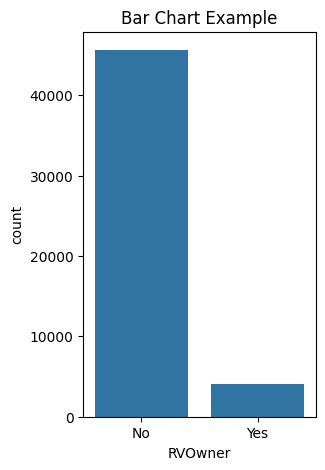

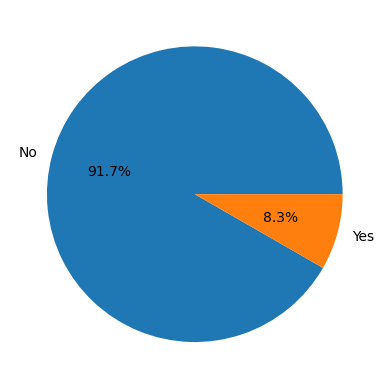

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='RVOwner', data=CustomerChurn,)
plt.xlabel('RVOwner')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['RVOwner'].value_counts().values, labels=CustomerChurn['RVOwner'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.Homeownership.value_counts())

Homeownership
Known      33725
Unknown    16027
Name: count, dtype: int64


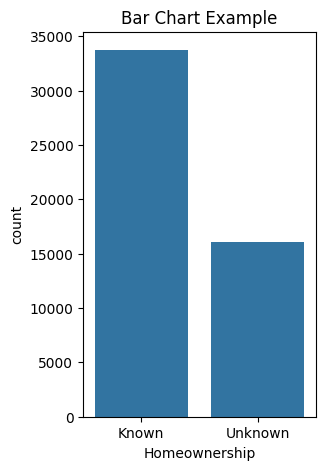

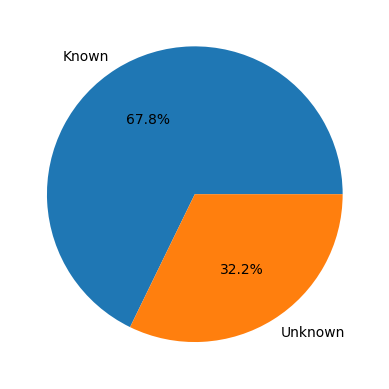

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='Homeownership', data=CustomerChurn,)
plt.xlabel('Homeownership')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['Homeownership'].value_counts().values, labels=CustomerChurn['Homeownership'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn['BuysViaMailOrder'].value_counts())

BuysViaMailOrder
No     31432
Yes    18320
Name: count, dtype: int64


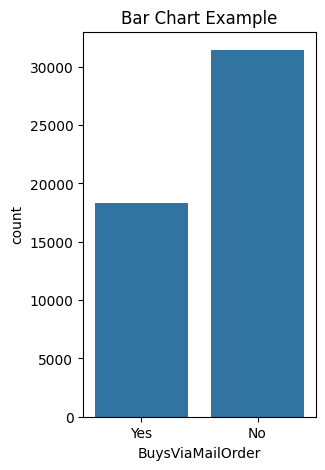

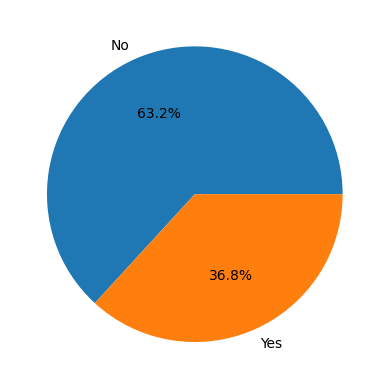

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='BuysViaMailOrder', data=CustomerChurn,)
plt.xlabel('BuysViaMailOrder')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['BuysViaMailOrder'].value_counts().values, labels=CustomerChurn['BuysViaMailOrder'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn['RespondsToMailOffers'].value_counts())

BuysViaMailOrder
No     31432
Yes    18320
Name: count, dtype: int64


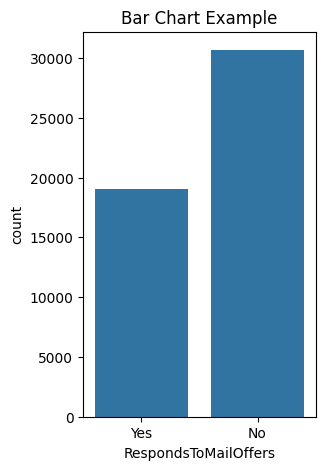

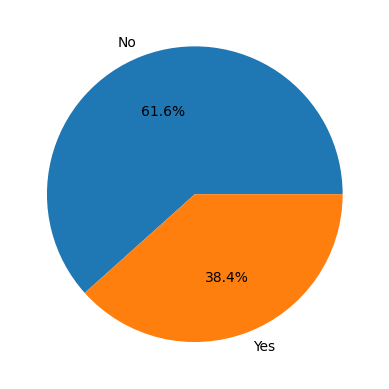

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='RespondsToMailOffers', data=CustomerChurn,)
plt.xlabel('RespondsToMailOffers')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['RespondsToMailOffers'].value_counts().values, labels=CustomerChurn['RespondsToMailOffers'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn['OptOutMailings'].value_counts())

OptOutMailings
No     49006
Yes      746
Name: count, dtype: int64


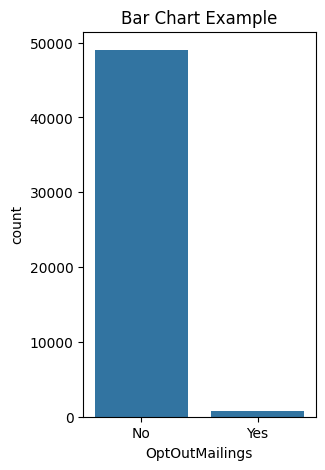

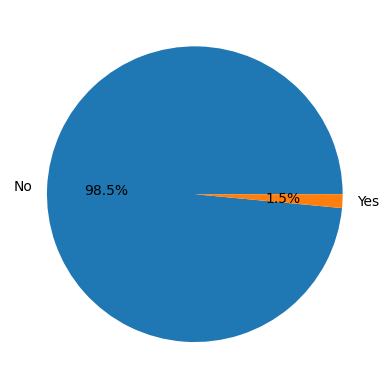

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='OptOutMailings', data=CustomerChurn,)
plt.xlabel('OptOutMailings')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['OptOutMailings'].value_counts().values, labels=CustomerChurn['OptOutMailings'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn['NonUSTravel'].value_counts())

NonUSTravel
No     46896
Yes     2856
Name: count, dtype: int64


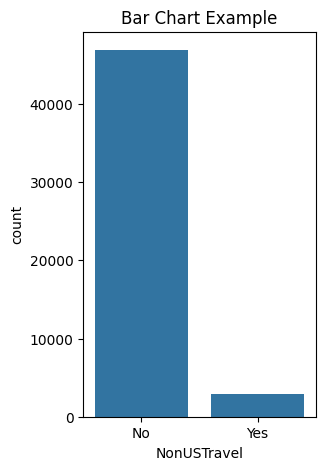

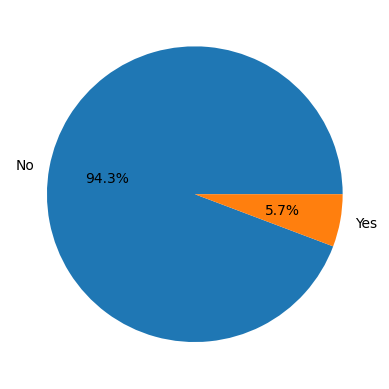

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='NonUSTravel', data=CustomerChurn,)
plt.xlabel('NonUSTravel')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['NonUSTravel'].value_counts().values, labels=CustomerChurn['NonUSTravel'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn['OwnsComputer'].value_counts())

OwnsComputer
No     40368
Yes     9384
Name: count, dtype: int64


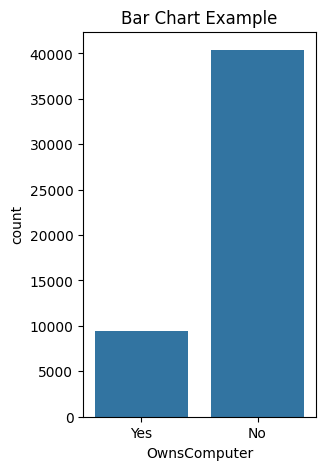

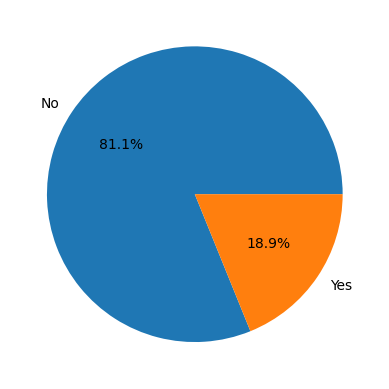

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='OwnsComputer', data=CustomerChurn,)
plt.xlabel('OwnsComputer')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['OwnsComputer'].value_counts().values, labels=CustomerChurn['OwnsComputer'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn['HasCreditCard'].value_counts())

HasCreditCard
Yes    34241
No     15511
Name: count, dtype: int64


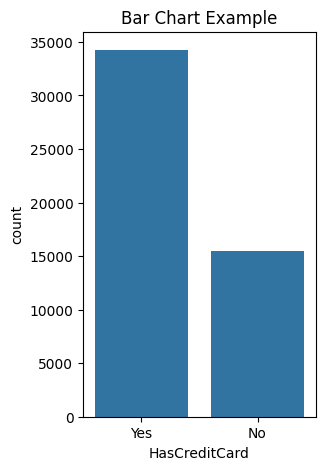

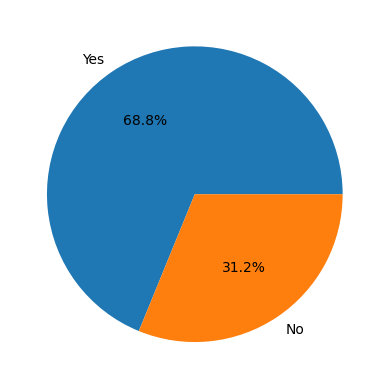

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='HasCreditCard', data=CustomerChurn,)
plt.xlabel('HasCreditCard')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['HasCreditCard'].value_counts().values, labels=CustomerChurn['HasCreditCard'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.NewCellphoneUser.value_counts())

NewCellphoneUser
No     40141
Yes     9611
Name: count, dtype: int64


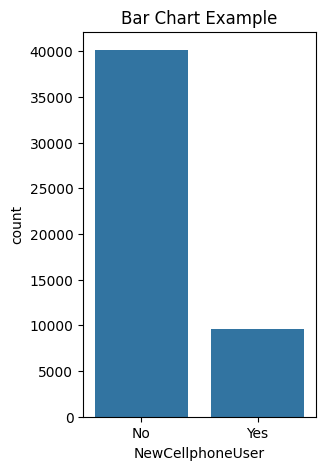

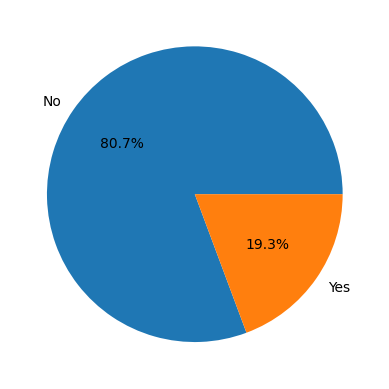

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='NewCellphoneUser', data=CustomerChurn,)
plt.xlabel('NewCellphoneUser')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['NewCellphoneUser'].value_counts().values, labels=CustomerChurn['NewCellphoneUser'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.NotNewCellphoneUser.value_counts())

NotNewCellphoneUser
No     42877
Yes     6875
Name: count, dtype: int64


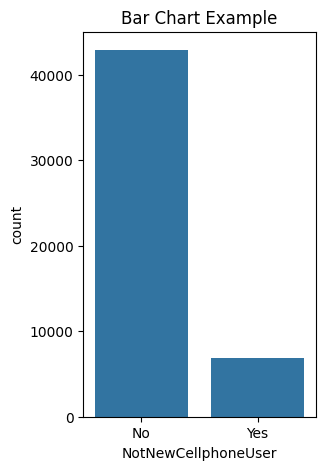

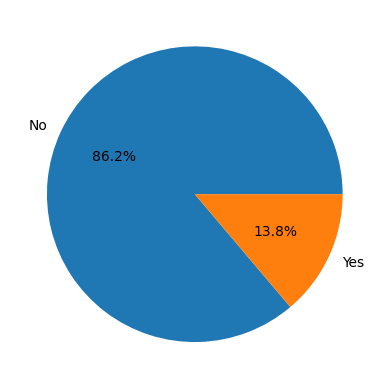

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='NotNewCellphoneUser', data=CustomerChurn,)
plt.xlabel('NotNewCellphoneUser')
plt.title('Bar Chart Example')
plt.show()

pie_data = plt.pie(CustomerChurn['NotNewCellphoneUser'].value_counts().values, labels=CustomerChurn['NotNewCellphoneUser'].value_counts().index, autopct='%1.1f%%')

In [ ]:
 print(CustomerChurn.OwnsMotorcycle.value_counts())


OwnsMotorcycle
No     49078
Yes      674
Name: count, dtype: int64


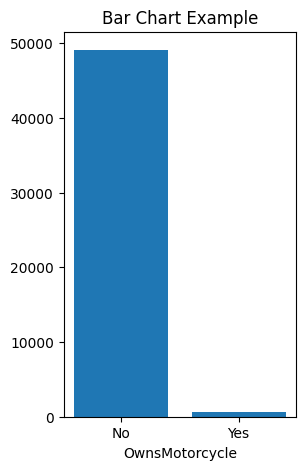

In [ ]:
# I decided to test this style too.
categories = ['No','Yes']
values = [49078,674]
plt.figure(figsize=(3,5))
plt.xlabel('OwnsMotorcycle')
plt.title('Bar Chart Example')
plt.bar(categories,values)
plt.show()






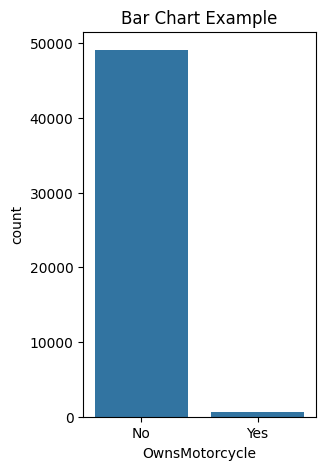

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='OwnsMotorcycle', data=CustomerChurn)
plt.xlabel('OwnsMotorcycle')
plt.title('Bar Chart Example')
plt.show()



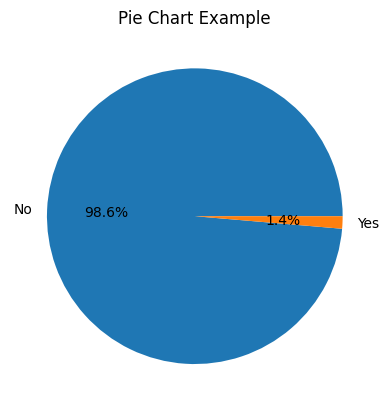

In [ ]:
pie_data = plt.pie(CustomerChurn['OwnsMotorcycle'].value_counts().values, labels=CustomerChurn['OwnsMotorcycle'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart Example')
plt.show()

In [ ]:
# I just thought of this in the process on my analysis.
print(CustomerChurn['HandsetPrice']value_counts())

HandsetPrice
Unknown    28263
30          7147
150         4024
130         2043
80          1901
10          1869
60          1730
200         1227
100         1209
40           240
400           45
250           20
300           12
180            9
500            7
240            6
Name: count, dtype: int64


In [ ]:
 print(CustomerChurn.HandsetPrice.value_counts())


HandsetPrice
Unknown    28263
30          7147
150         4024
130         2043
80          1901
10          1869
60          1730
200         1227
100         1209
40           240
400           45
250           20
300           12
180            9
500            7
240            6
Name: count, dtype: int64


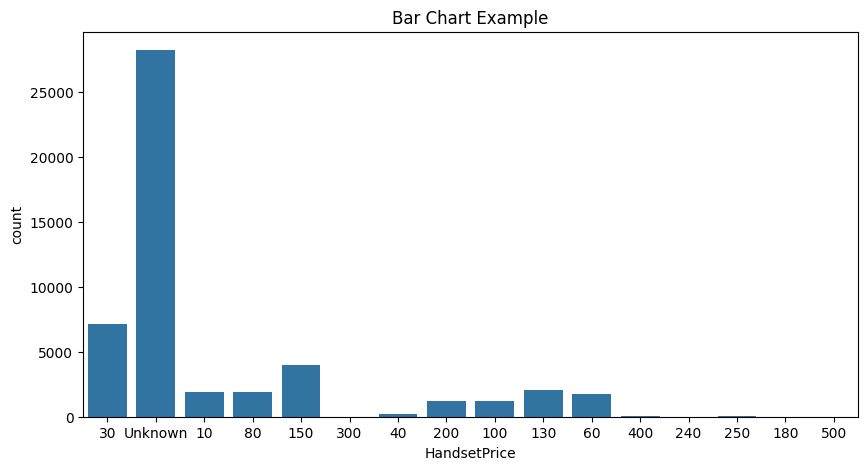

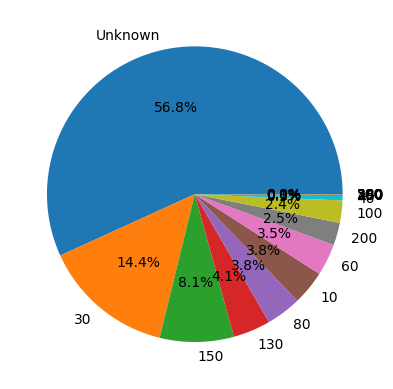

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='HandsetPrice', data=CustomerChurn,)
plt.xlabel('HandsetPrice')
plt.title('Bar Chart Example')
plt.show()



pie_data = plt.pie(CustomerChurn['HandsetPrice'].value_counts().values, labels=CustomerChurn['HandsetPrice'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.MadeCallToRetentionTeam.value_counts())

MadeCallToRetentionTeam
No     48131
Yes     1621
Name: count, dtype: int64


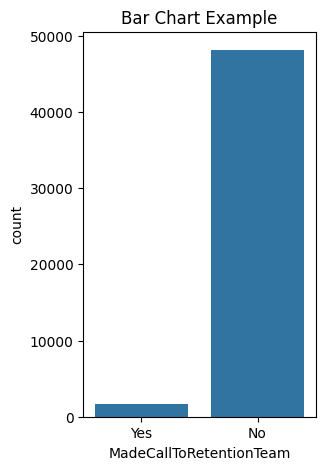

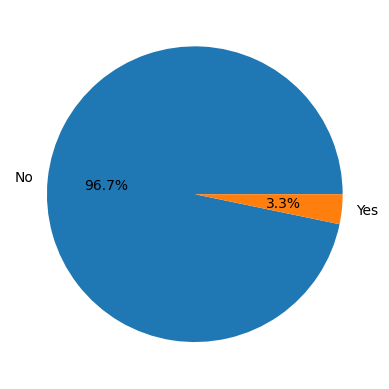

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='MadeCallToRetentionTeam', data=CustomerChurn,)
plt.xlabel('MadeCallToRetentionTeam')
plt.title('Bar Chart Example')
plt.show()



pie_data = plt.pie(CustomerChurn['MadeCallToRetentionTeam'].value_counts().values, labels=CustomerChurn['MadeCallToRetentionTeam'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.CreditRating.value_counts())

CreditRating
2-High       18692
1-Highest     8368
3-Good        8221
5-Low         6320
4-Medium      5227
7-Lowest      2049
6-VeryLow      875
Name: count, dtype: int64


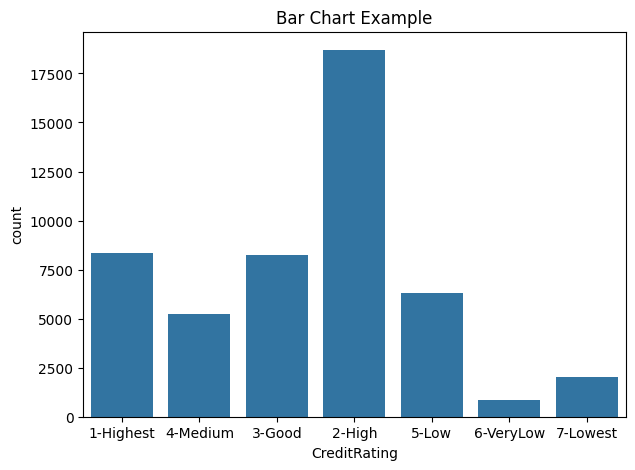

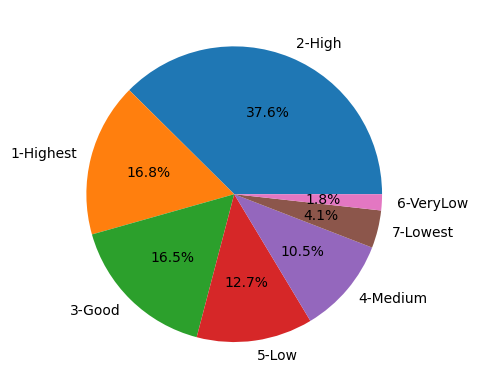

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='CreditRating', data=CustomerChurn,)
plt.xlabel('CreditRating')
plt.title('Bar Chart Example')
plt.show()



pie_data = plt.pie(CustomerChurn['CreditRating'].value_counts().values, labels=CustomerChurn['CreditRating'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.PrizmCode.value_counts())

PrizmCode
Other       23820
Suburban    16049
Town         7494
Rural        2389
Name: count, dtype: int64


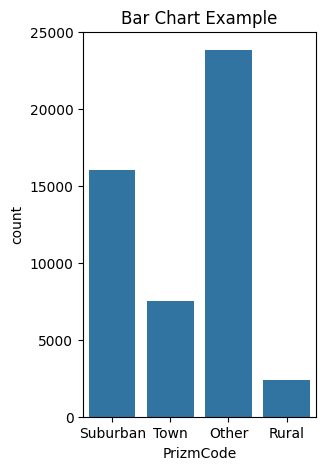

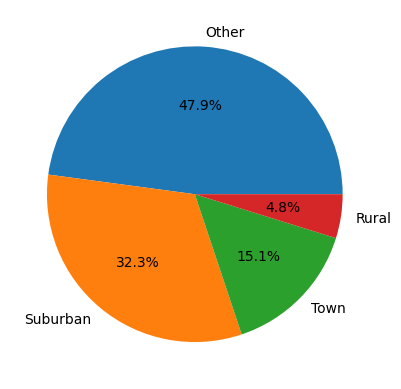

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='PrizmCode', data=CustomerChurn,)
plt.xlabel('PrizmCode')
plt.title('Bar Chart Example')
plt.show()



pie_data = plt.pie(CustomerChurn['PrizmCode'].value_counts().values, labels=CustomerChurn['PrizmCode'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.Occupation.value_counts())

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='CreditRating', data=CustomerChurn,)
plt.xlabel('CreditRating')
plt.title('Bar Chart Example')
plt.show()



pie_data = plt.pie(CustomerChurn['CreditRating'].value_counts().values, labels=CustomerChurn['CreditRating'].value_counts().index, autopct='%1.1f%%')

In [ ]:
print(CustomerChurn.MaritalStatus.value_counts())

MaritalStatus
Unknown    19700
Yes        18651
No         12696
Name: count, dtype: int64


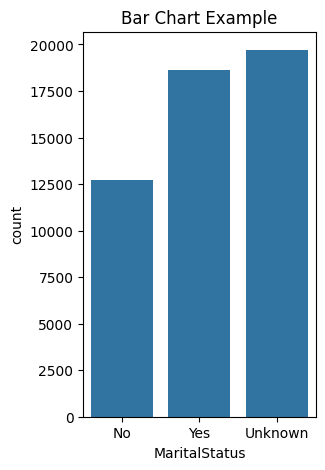

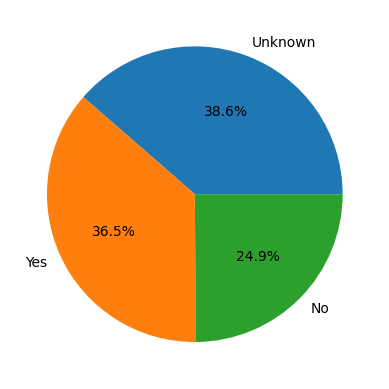

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(x='MaritalStatus', data=CustomerChurn,)
plt.xlabel('MaritalStatus')
plt.title('Bar Chart Example')
plt.show()



pie_data = plt.pie(CustomerChurn['MaritalStatus'].value_counts().values, labels=CustomerChurn['MaritalStatus'].value_counts().index, autopct='%1.1f%%')